# Laboratorio regresión lineal 

José Cifuentes - 17509

In [1]:
import pandas as pd
df=pd.read_csv("Admission_Predict.csv")
df.corr(method="pearson")

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000



Como podemos observar, la ultima columna se muestr la correlación de Pearson entre el Chance of Admit y todas las variables. Las variables que más se relacionan son el GRE Score y TOEFL Score, por lo que intentaremos hacer un modelo con estas dos variables. 


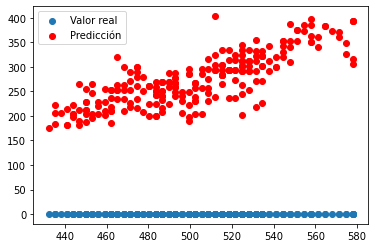

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from datasets import dataset_1,calculoDeErrorCross,XBad,calculoDeErrorTest
from gradient_descent import gradient_descent
from linear_cost import linear_cost
from linear_cost_derivate import linear_cost_derivate

# Training data
(X, y) = dataset_1
m, n = X.shape
theta_0 = np.random.rand(n, 1)

theta, costs, gradient_norms = gradient_descent(
	    XBad,
	    y,
	    theta_0,
	    linear_cost,
	    linear_cost_derivate,
	    alpha=0.0000001, #tamaño de pasos 0.00001 0.0000001
	    treshold=0.001,#Que tanto quiero que se apegue al 0 en el gradient descent
	    max_iter=10000,
	    Lambda=3 #regularizacion, que tanto quiero que se apegue a mis datos
	)

#puntos de datos
plt.scatter(X[:, 1], y,label='Valor real') 

#Puntos de regresion
plt.scatter(X[:, 1], np.matmul(X, theta), color='red',label='Predicción')

plt.legend()
plt.show()

La grafica de arriba muestra el resultado si solo metemos las dos columnas que deseamos utilizar, esto pasa ya que ambas columnas tienen rangos de valores muy diferentes. GRE Scores tiene un rango de 290 a 340, mientras que TOEFL Scores tiene un rango de 92 a 120.

Lo que debemos hacer es operar un poco ambas columnas para que nos de un rango de valores parecidas para ambas variables.

Tras varias pruebas, llegue a un rango que me parece aceptable. A la columna de GRE Scores la elevo al cuadrado y la divido dentro de 200, mientras que TOEFL Scores  lo elevo al cubo y lo divido dentro de 1500. Con estas modificaciones se logra tener un rango de 519 a 1156 en ambas variables. 

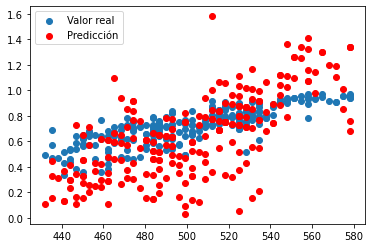

In [4]:
import numpy as np
from matplotlib import pyplot as plt

from datasets import dataset_1,calculoDeErrorCross,XBad,calculoDeErrorTest
from gradient_descent import gradient_descent
from linear_cost import linear_cost
from linear_cost_derivate import linear_cost_derivate

# Training data
(X, y) = dataset_1
m, n = X.shape
theta_0 = np.random.rand(n, 1)

for i in range(3):
    theta, costs, gradient_norms = gradient_descent(
            X,
            y,
            theta_0,
            linear_cost,
            linear_cost_derivate,
            alpha=0.0000001, #tamaño de pasos 0.00001 0.0000001
            treshold=0.001,#Que tanto quiero que se apegue al 0 en el gradient descent
            max_iter=10000,
            Lambda=50 #regularizacion, que tanto quiero que se apegue a mis datos
        )

#puntos de datos
plt.scatter(X[:, 1], y,label='Valor real') 

#Puntos de regresion
plt.scatter(X[:, 1], np.matmul(X, theta), color='red',label='Predicción')

plt.legend()
plt.show()

A continuación se saca el porcentaje de error del modelo

In [5]:
calculoDeErrorCross(theta)

29.263885797322462

Este no es un buen porcentaje de error, esto se puede deber al Lambda de nuestro modelo, busquemos uno mejor.

In [8]:
for i in range(1,20):
	theta, costs, gradient_norms = gradient_descent(
	    X,
	    y,
	    theta_0,
	    linear_cost,
	    linear_cost_derivate,
	    alpha=0.0000001, #tamaño de pasos
	    treshold=0.001,#Que tanto quiero que se apegue al 0 en el gradient descent
	    max_iter=10000,
	    Lambda=i #regularizacion, que tanto quiero que se apegue a mis datos
	)

	#linearCosts.append(linear_cost(X,y,theta,1))
	#linearCosts.append(calculoDeErrorCross(theta))
	#iteration.append(i)
	print("Lambda "+str(i)+"\t-\t"+str(calculoDeErrorCross(theta)))

Lambda 1	-	11.784965211816278
Lambda 2	-	11.250959051806769
Lambda 3	-	11.343164764625106
Lambda 4	-	11.512099977042054
Lambda 5	-	11.771622812464917
Lambda 6	-	12.090179994142963
Lambda 7	-	12.414646739324084
Lambda 8	-	12.739433421906442
Lambda 9	-	13.068618355191893
Lambda 10	-	13.426069294296259
Lambda 11	-	13.821147016173342
Lambda 12	-	14.230025676505111
Lambda 13	-	14.638755889888197
Lambda 14	-	15.047338505425497
Lambda 15	-	15.45577435517725
Lambda 16	-	15.876036269366875
Lambda 17	-	16.325625820392986
Lambda 18	-	16.78251144842628
Lambda 19	-	17.239370482775158


Analizando los resultados, seleccionamos nuestro nuevo Lambda

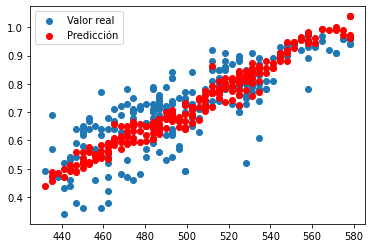

In [10]:
for i in range(3):
    theta, costs, gradient_norms = gradient_descent(
            X,
            y,
            theta_0,
            linear_cost,
            linear_cost_derivate,
            alpha=0.0000001, #tamaño de pasos 0.00001 0.0000001
            treshold=0.001,#Que tanto quiero que se apegue al 0 en el gradient descent
            max_iter=10000,
            Lambda=2 #regularizacion, que tanto quiero que se apegue a mis datos
        )

#puntos de datos
plt.scatter(X[:, 1], y,label='Valor real') 

#Puntos de regresion
plt.scatter(X[:, 1], np.matmul(X, theta), color='red',label='Predicción')

plt.legend()
plt.show()

A continuación se saca el porcentaje de error del modelo

In [11]:
calculoDeErrorCross(theta)

11.583199919307324

Este ya es un porcentaje de error aceptable.Ya que estamos conformes con nuestro modelo, veamos cual es el porcentaje de error del test set

In [13]:
calculoDeErrorTest(theta)

9.134094899751805

Los porcentajes de error del cross validation y del test set son muy similares, por lo que podemos asegurar que nuestro modelo es independiente del set de datos que usamos para entrenar. Esto quiere decir que mantendremos un porcentaje de error similar para cualquier set de datos. 